## 2. 의사결정트리 알고리즘

In [3]:
import pandas as pd 
import numpy as np 

pd_data = pd.read_csv("../datasets/ch12/vegeterianl_dataset.csv", delimiter=r"\s+")
pd_data.drop("ID", axis=1)

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,3900,chapparal
1,True,moderate,300,riparian
2,True,steep,1500,riparian
3,False,steep,1200,chapparal
4,False,flat,4450,conifer
5,True,steep,5000,conifer
6,True,steep,3000,chapparal


In [4]:
pd_data.sort_values("ELEVATION")

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


## 5. 의사결정트리의 구현

In [5]:
import pandas as pd
import numpy as np 

pd_data = pd.read_csv("https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv")
pd_data = pd_data.drop("RID", axis=1)

In [6]:
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [7]:
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df), len(not_buy)/len(df)])
    y = np.log2(x[x!=0])
    
    info_all = -sum(x[x!=0] * y)
    return info_all

In [8]:
get_info(pd_data)

0.9402859586706311

In [9]:
youth = pd_data.loc[pd_data['age'] == 'youth']
senior = pd_data.loc[pd_data['age'] == 'senior']
middle_aged = pd_data.loc[pd_data['age'] == 'middle_aged']

In [10]:
print(get_info(youth))

0.9709505944546686


In [11]:
print(get_info(senior))

0.9709505944546686


In [12]:
print(get_info(middle_aged))

-0.0


In [13]:
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
        
    return sum(get_infos)

In [14]:
get_attribute_info(pd_data, "age")

0.6935361388961918

In [15]:
get_info(pd_data) - get_attribute_info(pd_data, "age")

0.24674981977443933

In [16]:
get_info(pd_data) - get_attribute_info(pd_data, "income")

0.02922256565895487

In [17]:
get_info(pd_data) - get_attribute_info(pd_data, "student")

0.15183550136234159

In [18]:
get_info(pd_data) - get_attribute_info(pd_data, "credit_rating")

0.04812703040826949

In [19]:
youth = pd_data.loc[pd_data['age'] == 'youth']
get_info(youth) - get_attribute_info(youth, 'income')

-1.580026905978025

In [20]:
get_info(youth) - get_attribute_info(youth, "student")

-1.2367106860085422

In [21]:
get_info(youth) - get_attribute_info(youth, "credit_rating")

-1.527094404679944

### 사이킷런으로 의사결정트리 구현하기

In [30]:
import pandas as pd

train_df = pd.read_csv("../datasets/ch12/train.csv")
test_df = pd.read_csv("../datasets/ch12/test.csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values 

all_df = pd.concat([train_df, test_df]).set_index('PassengerId')

In [31]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [32]:
all_df['Sex'] = all_df['Sex'].replace({"male":0, "female":1})

all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [33]:
all_df['cabin_count'] = all_df['Cabin'].map(
    lambda x: len(x.split()) if type(x) == str else 0)

In [34]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,0
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [35]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"
    
all_df['social_status'] = all_df['Name'].map(lambda x: transform_status(x))

In [36]:
all_df['social_status'].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [37]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [38]:
all_df = all_df.drop([62, 830])
train_id = np.delete(train_id, [62-1, 830-1])

In [39]:
all_df[all_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [40]:
all_df.groupby(['Pclass', 'Sex'])['Fare'].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [41]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [42]:
all_df['cabin_type'] = all_df['Cabin'].map(lambda x: x[0] if type(x) == str else "99")

In [43]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,Mr,99
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,99
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0,Mr,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,99
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1,0,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,99


In [44]:
del all_df['Cabin']
del all_df['Name']
del all_df['Ticket']

In [45]:
y = all_df.loc[train_id, "Survived"].values
del all_df['Survived']

In [46]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [47]:
X_df = pd.get_dummies(all_df)

In [48]:
X = X_df.values

In [49]:
X_df

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1,26.000000,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,3,0,35.000000,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,24.816367,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1306,1,1,39.000000,0,0,108.9000,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1307,3,0,38.500000,0,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [51]:
minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [52]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

<AxesSubplot:>

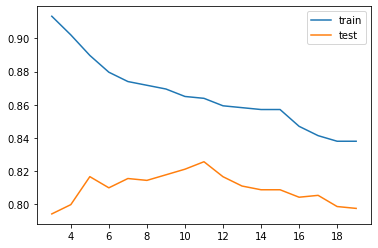

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    df = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(df, X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(
        accuracy_score(df.fit(X_train, y).predict(X_train), y)
    )
    test_accuracy.append(acc)
    
result = pd.DataFrame(train_accuracy, index=range(3, 20), columns=['train'])
result['test'] = test_accuracy

result.plot()